# ESMAC: Generate bar plot for aerosol composition

---


Setup dependencies:

In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
# these sys settings are just for the jupyterhub demo
import sys
sys.path.append('/home/'+os.environ['USER']+'/.local/lib/python3.9/site-packages')
import esmac_diags.plotting.plot_esmac_diags as plot


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e5dh19kn because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<br>Configure settings:

In [2]:
# set site name.
site = 'HISCALE'

# path of prepared files

data_path = '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/prep_data/'

prep_model_path = data_path +site+'/model/'
prep_obs_path = data_path +site+'/surface/'
prep_obs_path_2 = data_path +site+'/satellite/'
# set output path for plots
figpath= '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/figures/'+site+'/surface/'


<br>Read data:

In [3]:
filename = prep_obs_path + 'sfc_ACSM_'+site+'.nc'
obsdata = xr.open_dataset(filename)
time_acsm = obsdata['time'].load()
org = obsdata['org'].load()
so4 = obsdata['so4'].load()
nh4 = obsdata['nh4'].load()
no3 = obsdata['no3'].load()
chl = obsdata['chl'].load()
obsdata.close()

filename = prep_model_path + 'E3SMv1_'+site+'_sfc.nc'
modeldata = xr.open_dataset(filename)
time_m = modeldata['time'].load()
pom_m = modeldata['pom'].load()
mom_m = modeldata['mom'].load()
so4_m = modeldata['so4'].load()
soa_m = modeldata['soa'].load()
bc_m = modeldata['bc'].load()
dst_m = modeldata['dst'].load()
ncl_m = modeldata['ncl'].load()
modeldata.close()
org_m = pom_m + mom_m + soa_m

filename = prep_model_path + 'E3SMv2_'+site+'_sfc.nc'
modeldata = xr.open_dataset(filename)
time_m2 = modeldata['time'].load()
pom_m2 = modeldata['pom'].load()
mom_m2 = modeldata['mom'].load()
so4_m2 = modeldata['so4'].load()
soa_m2 = modeldata['soa'].load()
bc_m2 = modeldata['bc'].load()
dst_m2 = modeldata['dst'].load()
ncl_m2 = modeldata['ncl'].load()
modeldata.close()
org_m2 = pom_m2 + mom_m2 + soa_m2


<br>Specific data treatment:

In [4]:
# trim for the same time period
IOP = 'IOP1'
time1 = np.datetime64('2016-04-25')
time2 = np.datetime64('2016-05-22')
time = pd.date_range(start='2016-04-25', end='2016-05-22', freq="H")
# IOP = 'IOP2'
# time1 = np.datetime64('2016-08-28')
# time2 = np.datetime64('2016-09-23')
# time = pd.date_range(start='2016-08-28', end='2016-09-23', freq="H")

org = org[np.logical_and(time_acsm>=time1, time_acsm<=time2)]
so4 = so4[np.logical_and(time_acsm>=time1, time_acsm<=time2)]
nh4 = nh4[np.logical_and(time_acsm>=time1, time_acsm<=time2)]
no3 = no3[np.logical_and(time_acsm>=time1, time_acsm<=time2)]
chl = chl[np.logical_and(time_acsm>=time1, time_acsm<=time2)]
bc_m = bc_m[np.logical_and(time_m>=time1, time_m<=time2)]
dst_m = dst_m[np.logical_and(time_m>=time1, time_m<=time2)]
ncl_m = ncl_m[np.logical_and(time_m>=time1, time_m<=time2)]
so4_m = so4_m[np.logical_and(time_m>=time1, time_m<=time2)]
org_m = org_m[np.logical_and(time_m>=time1, time_m<=time2)]
bc_m2 = bc_m2[np.logical_and(time_m2>=time1, time_m2<=time2)]
dst_m2 = dst_m2[np.logical_and(time_m2>=time1, time_m2<=time2)]
ncl_m2 = ncl_m2[np.logical_and(time_m2>=time1, time_m2<=time2)]
so4_m2 = so4_m2[np.logical_and(time_m2>=time1, time_m2<=time2)]
org_m2 = org_m2[np.logical_and(time_m2>=time1, time_m2<=time2)]


<br>Generate plot:

/home/monicaihli/.local/lib/python3.9/site-packages/esmac_diags/plotting/plot_esmac_diags.py:923: RuntimeWarning: Mean of empty slice
  barsize = np.array([np.nanmean(vv) for vv in dataall[nn]])


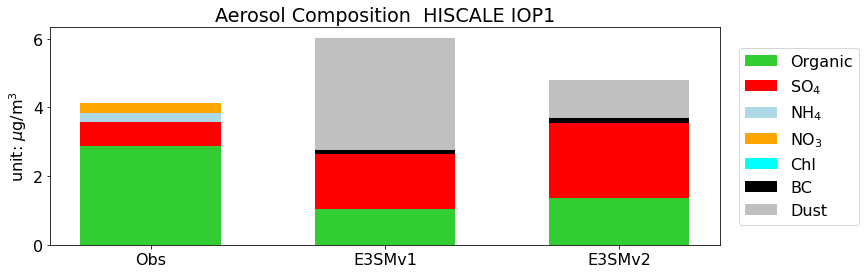

In [5]:
# output plot
if not os.path.exists(figpath):
    os.makedirs(figpath)
    
datagroup0 = [org,so4,nh4,no3,chl, [], []]
datagroup1 = [org_m, so4_m, [], [], [], bc_m, dst_m]
datagroup2 = [org_m2, so4_m2, [], [], [], bc_m2, dst_m2]
dataall=[datagroup0, datagroup1, datagroup2,]
labelall = ['Organic', 'SO$_4$', 'NH$_4$', 'NO$_3$', 'Chl', 'BC', 'Dust']
colorall = ['limegreen', 'red', 'lightblue', 'orange', 'cyan', 'k', 'silver']
fig,ax = plot.bar(dataall, datalabel=['Obs','E3SMv1','E3SMv2',], xlabel=None, ylabel='unit: $\mu$g/m$^3$', 
                  title='Aerosol Composition  '+site+' '+IOP, varlabel= labelall, colorall=colorall)
#fig.savefig(figpath+'bar_composition_'+site+'_'+IOP+'.png',dpi=fig.dpi,bbox_inches='tight', pad_inches=1)

# show figures in interactive commandline screen
import matplotlib.pyplot as plt
plt.show()   